In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator

%matplotlib inline


In [2]:
df = pd.read_excel('./section-3-event-logs-template1.xlsx', engine='openpyxl')

In [3]:
df.head(10)

,Unnamed: 0,event_uuid,user_uuid,event_time,device_type,session_uuid,user_neighborhood,event_page,event_type
0,0,b9e9489e-1218-4715-b42e-604e3745db07,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:34:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,search_page,choose_car
1,1,d7dca4a7-c4d0-4b50-b6fb-8c1429002b62,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:35:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,choose_car
2,2,cf2d094a-2898-4547-9e52-23a8fc9fc459,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,driver_page,choose_car
3,3,a4ff8e2c-2701-4a32-9029-bdf6efc155c5,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,search
4,4,04a6ac8f-4535-42e9-b84c-6940fa491ee5,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,search
5,5,4676fca7-17c6-4999-99bf-dafbd851c0f9,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:37:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,splash_page,choose_car
6,6,41b4f6b1-cc14-4c77-a520-50c1cb9cd592,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:37:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,open
7,7,3808dca1-c80b-4ff7-96e5-b545d6c05c08,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:38:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,open
8,8,73b945e9-691e-4e63-aa4d-da2f74599388,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-12 06:27:00,ios,8a08005b-7e74-4664-b25d-9e29d8316d71,Manhattan,splash_page,search
9,9,a070700c-8bd9-4b5a-9325-e029fda604c7,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-12 06:28:00,ios,8a08005b-7e74-4664-b25d-9e29d8316d71,Manhattan,book_page,choose_car


In [4]:
#verifying if the index of event_time is a datetime format. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124980 entries, 0 to 124979
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         124980 non-null  int64         
 1   event_uuid         124980 non-null  object        
 2   user_uuid          124980 non-null  object        
 3   event_time         124980 non-null  datetime64[ns]
 4   device_type        124980 non-null  object        
 5   session_uuid       124980 non-null  object        
 6   user_neighborhood  124980 non-null  object        
 7   event_page         124980 non-null  object        
 8   event_type         124980 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 8.6+ MB


In [5]:
df['month'] = df['event_time'].dt.month
df['day']= df['event_time'].dt.day
df['hour']= df['event_time'].dt.hour


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124980 entries, 0 to 124979
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         124980 non-null  int64         
 1   event_uuid         124980 non-null  object        
 2   user_uuid          124980 non-null  object        
 3   event_time         124980 non-null  datetime64[ns]
 4   device_type        124980 non-null  object        
 5   session_uuid       124980 non-null  object        
 6   user_neighborhood  124980 non-null  object        
 7   event_page         124980 non-null  object        
 8   event_type         124980 non-null  object        
 9   month              124980 non-null  int64         
 10  day                124980 non-null  int64         
 11  hour               124980 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 11.4+ MB


In [7]:
df.sample(3)

,Unnamed: 0,event_uuid,user_uuid,event_time,device_type,session_uuid,user_neighborhood,event_page,event_type,month,day,hour
40952,40952,be794eb5-11e5-4d59-b261-7b4f480fe5f1,faeb8201-f8df-488f-9568-e700a7761ca6,2019-10-05 21:51:00,mobile_web,4e3ddaf8-c7aa-4daf-9044-910d444cc12d,Manhattan,book_page,open,10,5,21
29725,29725,66559a31-df9c-4277-8164-6b3ceadbf550,ceb38a9c-e914-4560-a0d3-3a52a6d2f3fd,2019-10-09 20:17:00,android,993ed62e-8cc3-4f6b-9d83-62640e4b070f,Manhattan,search_page,open,10,9,20
111483,111483,f573f287-2ec2-4b74-a653-0b68087e527d,81fba0d3-4104-4a99-ad8f-e4c833454111,2019-10-09 15:02:00,mobile_web,754f663e-5fca-42a7-aeeb-14147d40d745,Manhattan,splash_page,open,10,9,15


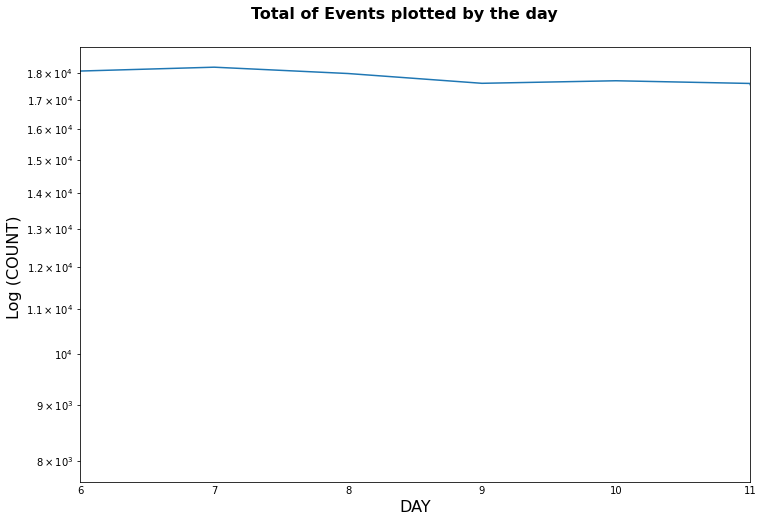

In [8]:


fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Total of Events plotted by the day', size=16, y=0.95, weight='bold')

df.groupby(['day'])['event_uuid'].count().plot(ax=ax,logy=True)

ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('Log (COUNT) ', fontsize=16)
ax.tick_params(axis ='x', which ='both', length = 0)

ax.set_xlim(6, 11)
y_major=MultipleLocator(1000)
ax.yaxis.set_major_locator(y_major)

In [13]:
from datetime import datetime

df['time'],df['date']= df['event_time'].apply(lambda x:x.time()), df['event_time'].apply(lambda x:x.date())
df

,Unnamed: 0,event_uuid,user_uuid,event_time,device_type,session_uuid,user_neighborhood,event_page,event_type,month,day,hour,Time,Date,time,date
0,0,b9e9489e-1218-4715-b42e-604e3745db07,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:34:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,search_page,choose_car,10,6,5,05:34:00,2019-10-06,05:34:00,2019-10-06
1,1,d7dca4a7-c4d0-4b50-b6fb-8c1429002b62,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:35:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,choose_car,10,6,5,05:35:00,2019-10-06,05:35:00,2019-10-06
2,2,cf2d094a-2898-4547-9e52-23a8fc9fc459,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,driver_page,choose_car,10,6,5,05:36:00,2019-10-06,05:36:00,2019-10-06
3,3,a4ff8e2c-2701-4a32-9029-bdf6efc155c5,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,search,10,6,5,05:36:00,2019-10-06,05:36:00,2019-10-06
4,4,04a6ac8f-4535-42e9-b84c-6940fa491ee5,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:00,ios,2d7b8da3-573a-447f-9964-acf32526b1db,Manhattan,book_page,search,10,6,5,05:36:00,2019-10-06,05:36:00,2019-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124975,124975,2080cc6a-861b-4253-9b2b-a617a146d3e2,71ade47d-d1a9-4dae-bf21-bb77291b35ed,2019-10-06 04:52:00,mobile_web,ef43011b-1525-451f-985f-90beece2f643,Manhattan,driver_page,open,10,6,4,04:52:00,2019-10-06,04:52:00,2019-10-06
124976,124976,ac05e7c8-81d3-4401-a37e-2b0b194971fb,71ade47d-d1a9-4dae-bf21-bb77291b35ed,2019-10-06 04:53:00,mobile_web,ef43011b-1525-451f-985f-90beece2f643,Manhattan,search_page,open,10,6,4,04:53:00,2019-10-06,04:53:00,2019-10-06
124977,124977,4ef00123-7c37-42bb-995e-c6dbfa090671,71ade47d-d1a9-4dae-bf21-bb77291b35ed,2019-10-06 04:53:00,mobile_web,ef43011b-1525-451f-985f-90beece2f643,Manhattan,driver_page,open,10,6,4,04:53:00,2019-10-06,04:53:00,2019-10-06
124978,124978,f2050c51-6652-4299-bc3d-35ff402980c2,71ade47d-d1a9-4dae-bf21-bb77291b35ed,2019-10-06 04:54:00,mobile_web,ef43011b-1525-451f-985f-90beece2f643,Manhattan,search_page,open,10,6,4,04:54:00,2019-10-06,04:54:00,2019-10-06


In [14]:
df.groupby(['date'])['event_uuid'].count()

date
2019-10-05     9891
2019-10-06    18056
2019-10-07    18202
2019-10-08    17963
2019-10-09    17600
2019-10-10    17694
2019-10-11    17595
2019-10-12     7979
Name: event_uuid, dtype: int64

In [43]:
df['date']=  pd.to_datetime(df['date'])
df_n = df[['event_uuid', 'date', 'time', 'user_uuid']]
df_n = df_n.set_index('date')
df_n = df_n.groupby(['date'])['event_uuid'].count()

df_n.info()
df_n.head()

AttributeError: 'Series' object has no attribute 'info'

<class 'datetime.datetime'>
<class 'datetime.datetime'>


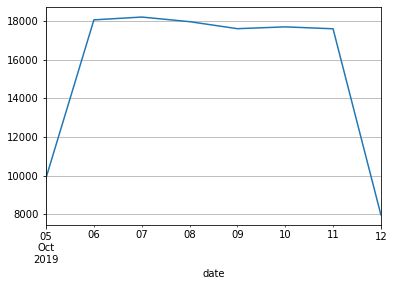

In [46]:
start_date = datetime(2019,10,1)
end_date = datetime(2019,11,1)
print(type(start_date))
print(type(end_date))
df_n[(start_date <= df_n.index) & (df_n.index <= end_date)].plot(grid=True)

df_n.to_csv('./testontableau')

In [45]:
#additive decomposition model https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621

import statmodels.api as sm



ModuleNotFoundError: No module named 'statmodels'

<AxesSubplot:xlabel='hour'>

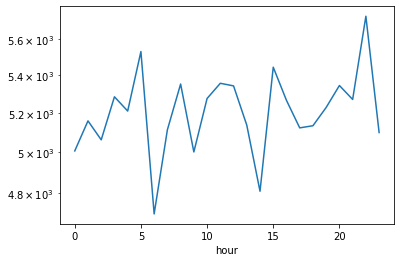

In [10]:
df.groupby(['hour'])['event_uuid'].count().plot(logy=True)

# Transformation of Data

In [11]:
df.groupby(['day'])['user_neighborhood'].value_counts()

day  user_neighborhood
5    Manhattan             6869
     Brooklyn              2009
     Queens                 595
     Bronx                  250
     Staten Island          168
6    Manhattan            12591
     Brooklyn              3737
     Queens                 842
     Bronx                  533
     Staten Island          353
7    Manhattan            12807
     Brooklyn              3590
     Queens                 905
     Bronx                  507
     Staten Island          393
8    Manhattan            12180
     Brooklyn              4025
     Queens                 893
     Bronx                  469
     Staten Island          396
9    Manhattan            12270
     Brooklyn              3440
     Queens                1026
     Bronx                  510
     Staten Island          354
10   Manhattan            12371
     Brooklyn              3400
     Queens                1069
     Staten Island          460
     Bronx                  394
11   Manhattan   

In [12]:
 df.groupby(['day'])['event_page'].value_counts()

day  event_page 
5    search_page    3995
     splash_page    2954
     book_page      1977
     driver_page     965
6    search_page    7219
     splash_page    5466
     book_page      3548
     driver_page    1823
7    search_page    7307
     splash_page    5448
     book_page      3576
     driver_page    1871
8    search_page    7221
     splash_page    5376
     book_page      3572
     driver_page    1794
9    search_page    6979
     splash_page    5280
     book_page      3586
     driver_page    1755
10   search_page    7201
     splash_page    5380
     book_page      3424
     driver_page    1689
11   search_page    7137
     splash_page    5184
     book_page      3506
     driver_page    1768
12   search_page    3174
     splash_page    2365
     book_page      1639
     driver_page     801
Name: event_page, dtype: int64

In [58]:
t = df.groupby(['event_page'])['day'].value_counts().unstack().T
t
t['booking to search ratio'] = t['book_page']/t['search_page']*100
t

event_page,book_page,driver_page,search_page,splash_page,booking to search ratio
day,,,,,
5,1977,965,3995,2954,49.486859
6,3548,1823,7219,5466,49.148081
7,3576,1871,7307,5448,48.939373
8,3572,1794,7221,5376,49.466833
9,3586,1755,6979,5280,51.382720
10,3424,1689,7201,5380,47.548952
11,3506,1768,7137,5184,49.124282
12,1639,801,3174,2365,51.638311


In [13]:
df.groupby(['day'])['device_type'].value_counts()

day  device_type
5    mobile_web     5149
     ios            2384
     android        1463
     desktop_web     895
6    mobile_web     8842
     ios            4337
     android        2870
     desktop_web    2007
7    mobile_web     9531
     ios            4217
     android        2854
     desktop_web    1600
8    mobile_web     8903
     ios            4373
     android        2729
     desktop_web    1958
9    mobile_web     8764
     ios            4380
     android        2744
     desktop_web    1712
10   mobile_web     8784
     ios            4482
     android        2562
     desktop_web    1866
11   mobile_web     8646
     ios            4500
     android        2672
     desktop_web    1777
12   mobile_web     4040
     ios            2026
     android        1231
     desktop_web     682
Name: device_type, dtype: int64

In [63]:
t2 = df.groupby(['day'])['device_type'].value_counts().unstack()
t2
t2['web to mobile ratio'] = (t2['mobile_web']+t2['desktop_web'])/(t2['ios']+t2['android'])
t2['mobile web to tot.mobile'] = (t2['mobile_web'])/(t2['ios']+t2['android'])
t2

device_type,android,desktop_web,ios,mobile_web,web to mobile ratio,mobile web to tot.mobile
day,,,,,,
5,1463,895,2384,5149,1.571094,1.338446
6,2870,2007,4337,8842,1.505342,1.226863
7,2854,1600,4217,9531,1.574176,1.347900
8,2729,1958,4373,8903,1.529288,1.253591
9,2744,1712,4380,8764,1.470522,1.230208
10,2562,1866,4482,8784,1.511925,1.247019
11,2672,1777,4500,8646,1.453291,1.205521
12,1231,682,2026,4040,1.449800,1.240405


In [14]:
df.groupby(['day'])['event_type'].value_counts()

day  event_type 
5    open            6594
     choose_car      1498
     search          1484
     request_car      277
     begin_ride        38
6    open           11733
     search          2891
     choose_car      2843
     request_car      540
     begin_ride        49
7    open           11767
     choose_car      2953
     search          2824
     request_car      596
     begin_ride        62
8    open           11662
     search          2899
     choose_car      2769
     request_car      547
     begin_ride        86
9    open           11531
     search          2749
     choose_car      2725
     request_car      538
     begin_ride        57
10   open           11325
     search          2904
     choose_car      2801
     request_car      607
     begin_ride        57
11   open           11371
     search          2821
     choose_car      2804
     request_car      521
     begin_ride        78
12   open            5133
     search          1307
     choose_car      

In [51]:
df.groupby(['event_type'])['day'].value_counts().unstack()

day,5,6,7,8,9,10,11,12
event_type,,,,,,,,
begin_ride,38,49,62,86,57,57,78,18
choose_car,1498,2843,2953,2769,2725,2801,2804,1301
open,6594,11733,11767,11662,11531,11325,11371,5133
request_car,277,540,596,547,538,607,521,220
search,1484,2891,2824,2899,2749,2904,2821,1307


## Rolling means and variances

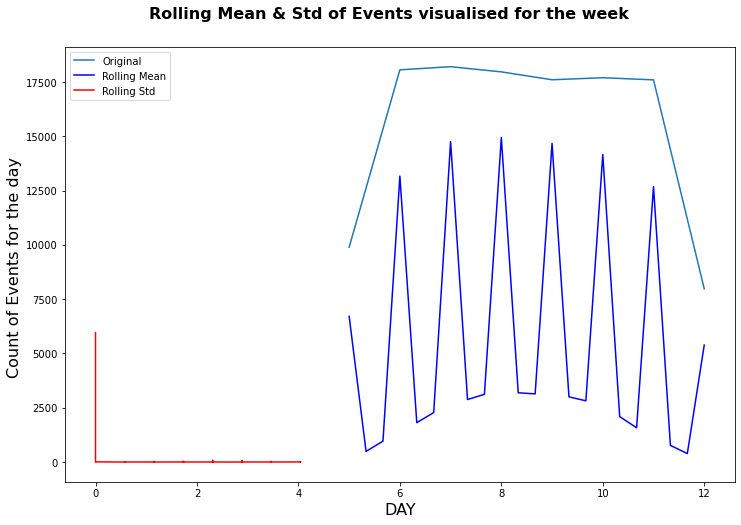

In [49]:

fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Rolling Mean & Std of Events visualised for the week', size=16, y=0.95, weight='bold')

# sns.countplot(x='dates', data=df, ax=ax)

df['day'].value_counts().sort_index().plot(grid=True, label='Original')
df['rolmean_day'] =  df['day'].rolling(window=3).mean()
df['rolmean_day'].value_counts().sort_index().plot(color='blue', label='Rolling Mean')
df['rolstd_day'] =  df['day'].rolling(window=3).std()
df['rolstd_day'].value_counts().sort_index().plot(color='red', label='Rolling Std')


ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('Count of Events for the day ', fontsize=16)
plt.legend(loc='best')


Text(0, 0.5, 'Count of Events for the day ')

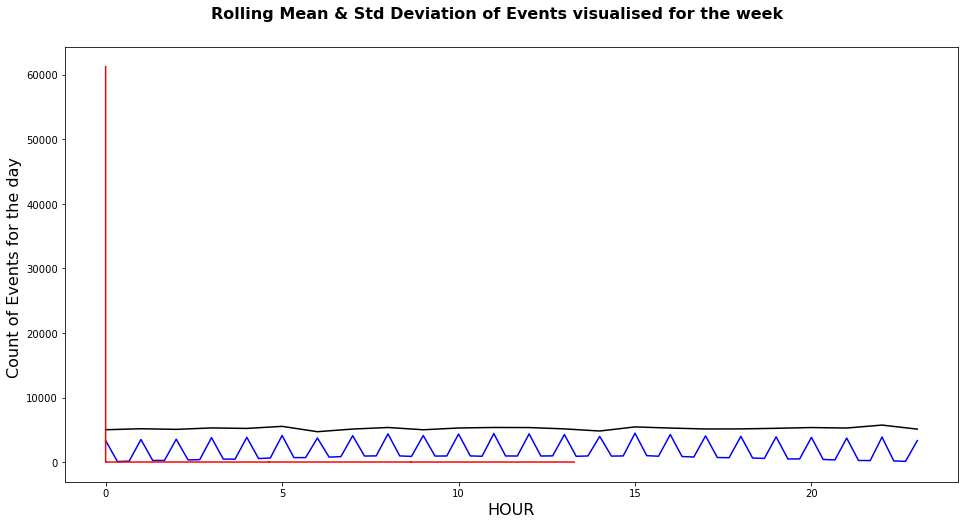

In [16]:
fig,ax = plt.subplots(1, figsize=(16,8))
fig.suptitle('Rolling Mean & Std Deviation of Events visualised for the week', size=16, y=0.95, weight='bold')

df['hour'] =  df['event_time'].dt.hour
df['rolmean_h'] =  df['hour'].rolling(window=3).mean()
df['rolstd_h'] =  df['hour'].rolling(window=3).std()

df['hour'].value_counts().sort_index().plot(grid=True, color='black')
df['rolmean_h'].value_counts().sort_index().plot(color='blue')
df['rolstd_h'].value_counts().sort_index().plot(color='red')

ax.set_xlabel('HOUR', fontsize=16)
ax.set_ylabel('Count of Events for the day ', fontsize=16)



In [17]:
# # logscale 

# fig,ax = plt.subplots(1, figsize=(16,8))
# fig.suptitle('Rolling Mean & Std Deviation of Events visualised for the week', size=16, y=0.95, weight='bold')

# df_log= np.log(df['day'])
# plt.plot(df_log)

# ax.set_xlabel('HOUR', fontsize=16)
# ax.set_ylabel('Count of Events for the day ', fontsize=16)



## Logarithms 

To understand changes over time that are either too small or too large we switch to logarithms 

Let us explore the changes happening across `event_page` and `event_type` and `device_type` which as per the above visualisations showcase only 'small' changes happening across time.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124980 entries, 0 to 124979
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         124980 non-null  int64         
 1   event_uuid         124980 non-null  object        
 2   user_uuid          124980 non-null  object        
 3   event_time         124980 non-null  datetime64[ns]
 4   device_type        124980 non-null  object        
 5   session_uuid       124980 non-null  object        
 6   user_neighborhood  124980 non-null  object        
 7   event_page         124980 non-null  object        
 8   event_type         124980 non-null  object        
 9   month              124980 non-null  int64         
 10  day                124980 non-null  int64         
 11  hour               124980 non-null  int64         
 12  rolmean_day        124978 non-null  float64       
 13  rolstd_day         124978 non-null  float64 

## Event_Type

In [65]:
event_type = df.groupby(['event_type'])['day'].value_counts()

In [66]:
event_type_1 = event_type.unstack(0)

In [68]:
event_type_1['begin_ride to request_car'] = event_type_1['begin_ride']/event_type_1['request_car']*100

In [69]:
event_type_1

event_type,begin_ride,choose_car,open,request_car,search,begin_ride to request_car
day,,,,,,
5,38,1498,6594,277,1484,13.718412
6,49,2843,11733,540,2891,9.074074
7,62,2953,11767,596,2824,10.402685
8,86,2769,11662,547,2899,15.722121
9,57,2725,11531,538,2749,10.594796
10,57,2801,11325,607,2904,9.390445
11,78,2804,11371,521,2821,14.971209
12,18,1301,5133,220,1307,8.181818


In [71]:
event_type_1.describe().T

,count,mean,std,min,25%,50%,75%,max
event_type,,,,,,,,
begin_ride,8.0,55.625000,21.507059,18.000000,46.250000,57.00000,66.000000,86.000000
choose_car,8.0,2461.750000,661.033984,1301.000000,2418.250000,2785.00000,2813.750000,2953.000000
open,8.0,10139.500000,2672.609533,5133.000000,10142.250000,11451.00000,11679.750000,11767.000000
request_car,8.0,480.750000,147.126525,220.000000,460.000000,539.00000,559.250000,607.000000
search,8.0,2484.875000,676.016787,1307.000000,2432.750000,2822.50000,2893.000000,2904.000000
begin_ride to request_car,8.0,11.506945,2.882601,8.181818,9.311352,10.49874,14.031611,15.722121


Text(0, 0.5, 'COUNT ')

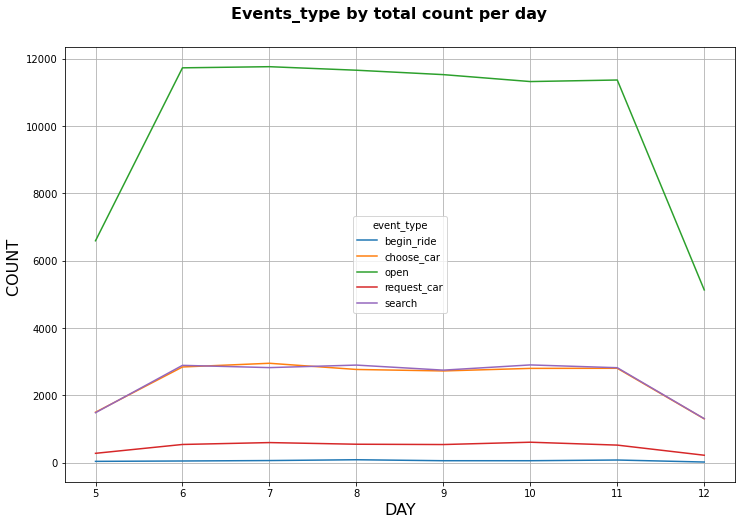

In [22]:
fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Events_type by total count per day', size=16, y=0.95, weight='bold')

event_type_1.plot(ax=ax, grid=True)

ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('COUNT ', fontsize=16)

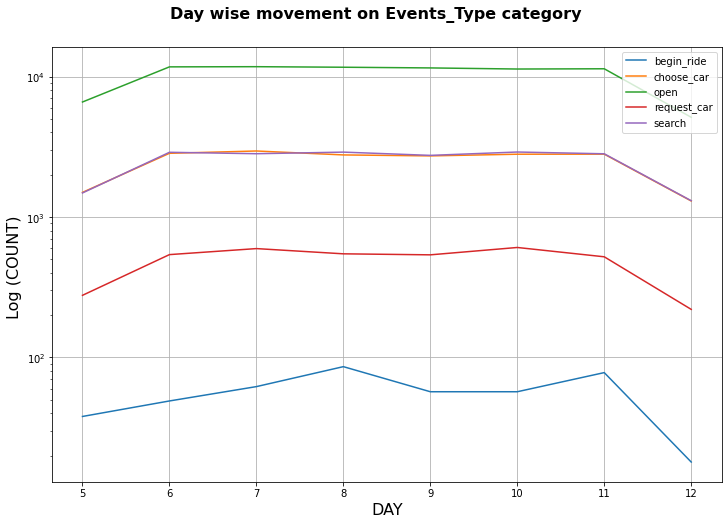

In [23]:
fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Day wise movement on Events_Type category', size=16, y=0.95, weight='bold')

event_type_1.plot(ax=ax, legend=True, grid=True, logy=True)

ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('Log (COUNT) ', fontsize=16)
plt.legend(loc='upper right')

## Device_Type

In [24]:
device_type = df.groupby(['device_type'])['day'].value_counts()

In [25]:
device_type_1 = device_type.unstack(0)

In [26]:
device_type_1

device_type,android,desktop_web,ios,mobile_web
day,,,,
5,1463,895,2384,5149
6,2870,2007,4337,8842
7,2854,1600,4217,9531
8,2729,1958,4373,8903
9,2744,1712,4380,8764
10,2562,1866,4482,8784
11,2672,1777,4500,8646
12,1231,682,2026,4040


Text(0, 0.5, 'COUNT ')

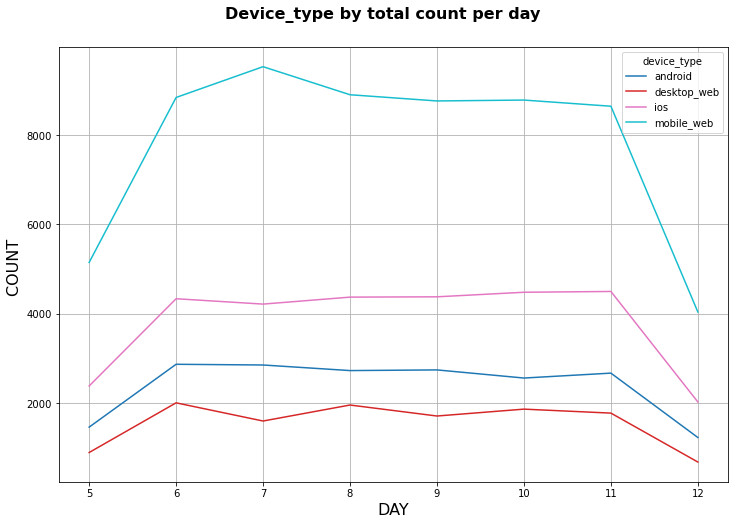

In [27]:
fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Device_type by total count per day', size=16, y=0.95, weight='bold')

device_type_1.plot(ax=ax, grid=True, cmap='tab10')

ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('COUNT ', fontsize=16)

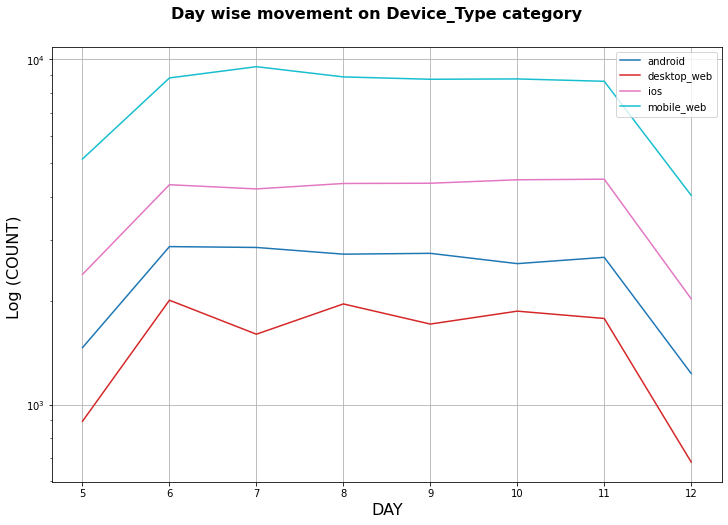

In [28]:
fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Day wise movement on Device_Type category', size=16, y=0.95, weight='bold')

device_type_1.plot(ax=ax, legend=True, grid=True, logy=True, cmap='tab10')

ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('Log (COUNT) ', fontsize=16)
plt.legend(loc='upper right')

## Event_Page

In [29]:
event_page = df.groupby(['event_page'])['day'].value_counts()

In [30]:
event_page_1 = event_page.unstack(0)

In [31]:
print(type(event_page_1))
event_page_1

<class 'pandas.core.frame.DataFrame'>


event_page,book_page,driver_page,search_page,splash_page
day,,,,
5,1977,965,3995,2954
6,3548,1823,7219,5466
7,3576,1871,7307,5448
8,3572,1794,7221,5376
9,3586,1755,6979,5280
10,3424,1689,7201,5380
11,3506,1768,7137,5184
12,1639,801,3174,2365


Text(0, 0.5, 'COUNT ')

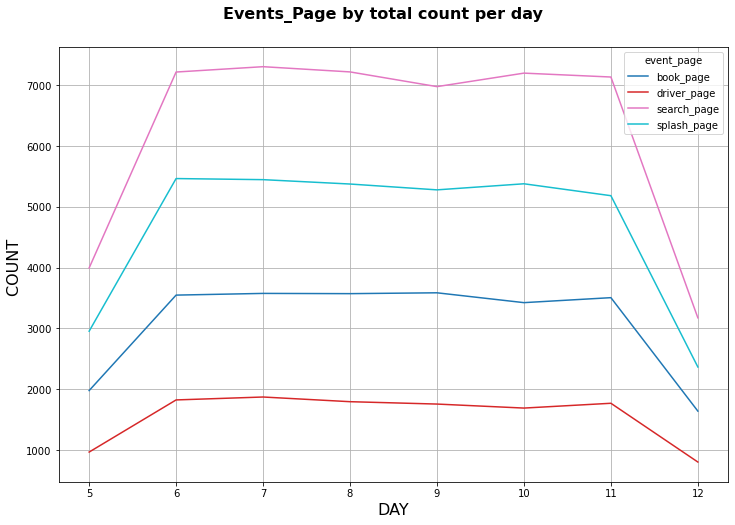

In [32]:
fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Events_Page by total count per day', size=16, y=0.95, weight='bold')

event_page_1.plot(ax=ax, grid=True, cmap='tab10')

ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('COUNT ', fontsize=16)

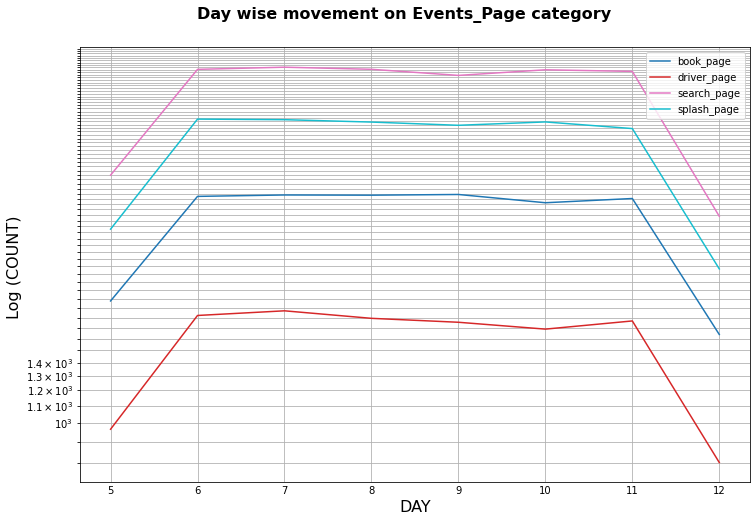

In [33]:

fig,ax = plt.subplots(1, figsize=(12,8))
fig.suptitle('Day wise movement on Events_Page category', size=16, y=0.95, weight='bold')

event_page_1.plot(ax=ax, grid=True, cmap='tab10')
ax.set_yscale('log')

ax.set_xlabel('DAY', fontsize=16)
ax.set_ylabel('Log (COUNT) ', fontsize=16)
plt.legend(loc='upper right')

ax.tick_params(axis ='x', which ='both', length = 0)
y_major=MultipleLocator(100)
ax.yaxis.set_major_locator(y_major)

# ax.set_yticklabels(['']*len(ax.get_yticklabels()))
# y_major = MultipleLocator(10**3)
# ax.yaxis.set_major_locator(y_major)

# ax.yaxis.set_minor_locator(y_minor)
